<a href="https://colab.research.google.com/github/leticiajsx/alura-challenge-data-science/blob/main/analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 2 - Analise dos dados

### Importando bibliotecas

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Obter dados

In [193]:
dados = pd.read_csv('/content/drive/MyDrive/alura challenge DS 1/Telco-Customer-Churn-limpeza.csv')
dados

,id_cliente,cancelou,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,possui_tv,possui_filmes,tipo_contrato,fatura_online,forma_pagamento,total_mensal,total_gasto,total_diario
0,0002-ORFBO,nao,feminino,nao,sim,sim,9,sim,nao,DSL,...,nao,sim,sim,nao,um ano,sim,cheque,65.60,593.30,2.186667
1,0003-MKNFE,nao,masculino,nao,nao,nao,9,sim,sim,DSL,...,nao,nao,nao,sim,mensal,nao,cheque,59.90,542.40,1.996667
2,0004-TLHLJ,sim,masculino,nao,nao,nao,4,sim,nao,fibra optica,...,sim,nao,nao,nao,mensal,sim,cheque eletronico,73.90,280.85,2.463333
3,0011-IGKFF,sim,masculino,sim,sim,nao,13,sim,nao,fibra optica,...,sim,nao,sim,sim,mensal,sim,cheque eletronico,98.00,1237.85,3.266667
4,0013-EXCHZ,sim,feminino,sim,sim,nao,3,sim,nao,fibra optica,...,nao,sim,sim,nao,mensal,sim,cheque,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,nao,feminino,nao,nao,nao,13,sim,nao,DSL,...,nao,sim,nao,nao,um ano,nao,cheque,55.15,742.90,1.838333
7028,9992-RRAMN,sim,masculino,nao,sim,nao,22,sim,sim,fibra optica,...,nao,nao,nao,sim,mensal,sim,cheque eletronico,85.10,1873.70,2.836667
7029,9992-UJOEL,nao,masculino,nao,nao,nao,2,sim,nao,DSL,...,nao,nao,nao,nao,mensal,sim,cheque,50.30,92.75,1.676667
7030,9993-LHIEB,nao,masculino,nao,sim,sim,67,sim,nao,DSL,...,sim,sim,nao,sim,dois anos,nao,cheque,67.85,4627.65,2.261667


### Analisar a variável target: Churn

In [194]:
dados['cancelou'].describe()

count     7032
unique       2
top        nao
freq      5163
Name: cancelou, dtype: object

### Visualizar a distribuição

In [195]:
colors = ['#9BBFE0','#E8A09A', '#FBE29F', '#C6D68F', '#BCBABB']

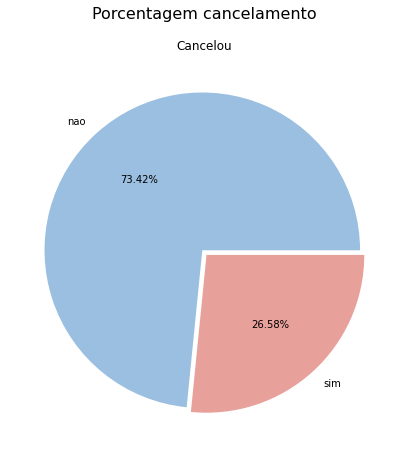

In [196]:
plt.figure(figsize = (10, 6))

ax = dados['cancelou'].value_counts().plot.pie(explode=[0.02,0.02], autopct='%0.2f%%', colors=colors)

plt.title('Cancelou', fontsize=12)
plt.suptitle('Porcentagem cancelamento', fontsize=16, y=1.05)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

### Visualizações relevantes

Será que idosos cancelam mais os serviços?

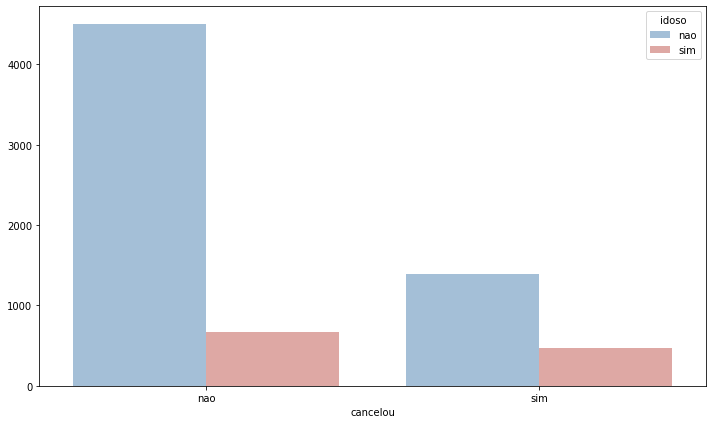

In [197]:
plt.figure(figsize = (10, 6))

ax = sns.countplot(x='cancelou', hue='idoso', data=dados, palette=colors)

ax.set_ylabel('')

plt.tight_layout()
plt.show()

Visualizando esse gráfico podemos concluir que os idosos não são os que mais cancelam o serviço, porem a quantidade de idosos que possuem o serviço é bem menor em comparação a outras idades.

  Entre homens e mulheres, qual cancela mais?

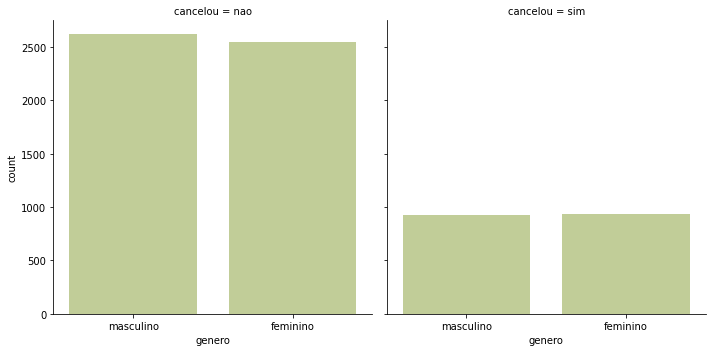

In [198]:
g = sns.FacetGrid(dados, col='cancelou', height=5)
g.map(sns.countplot, 'genero', color=colors[3], order=['masculino', 'feminino'])

plt.tight_layout()
plt.show()

A diferença de cancelamento entre os dois gêneros é muito pequena.

### Analisar correlação

In [199]:
dados.corr()

,meses_contrato,total_mensal,total_gasto,total_diario
meses_contrato,1.000000,0.246862,0.825880,0.246862
total_mensal,0.246862,1.000000,0.651065,1.000000
total_gasto,0.825880,0.651065,1.000000,0.651065
total_diario,0.246862,1.000000,0.651065,1.000000


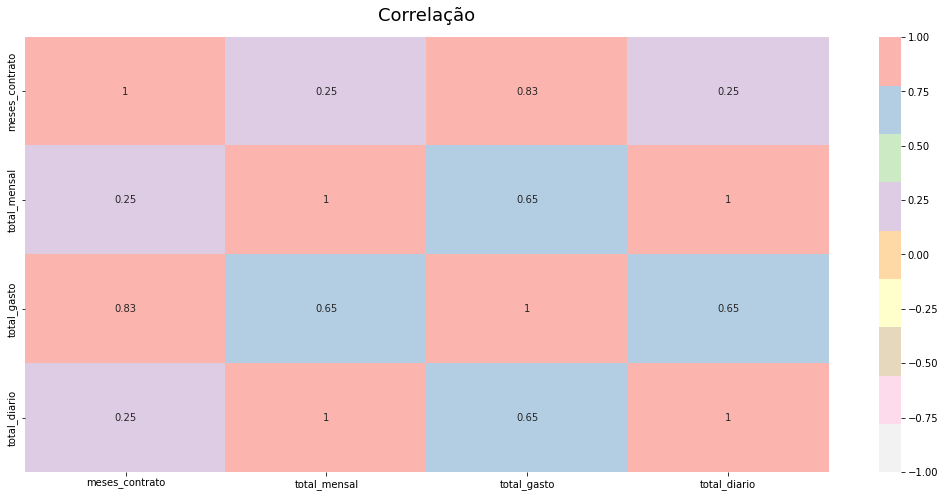

In [200]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(dados.corr(), vmin=-1, vmax=1, annot=True, cmap='Pastel1_r')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

Meses de contrato tem uma correlação muito alta com o total gasto, afinal quanto mais tempo de contrato, mais o cliente gastará com o serviço.